In [0]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import roc_curve,auc
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [0]:

url='https://raw.githubusercontent.com/scarface961/Bank-Marketting/master/bank-full.csv'
data = pd.read_csv(url,delimiter=';')
#data1 = pd.read_csv("D:/Data Mining and Concepts Learning/Project/bank/bank.csv")

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [0]:
data=pd.get_dummies(data, columns=["job","marital","education","default","housing","loan","contact","month","poutcome"])

labelencoder = LabelEncoder()
data['y'] = labelencoder.fit_transform(data['y'])

In [5]:
data

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [0]:
def epoch (history):
  # Plot training & validation accuracy values
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [0]:
def dPCA(X_train,X_test):
    pca = PCA(n_components= 6)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    return X_train,X_test


In [0]:
def dSMOTE(X_train,y_train):
    smt = SMOTE()
    X_train, y_train = smt.fit_sample(X_train, y_train)
    return X_train, y_train

In [0]:
def percentage_split_NN(percentage_split,X,Y):
  x_train,x_test,y_train,y_test = train_test_split(X,Y,stratify=Y,test_size = percentage_split,random_state=0)

  model= create_NN_model()
  history = model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=150, batch_size=100)
  pred = model.predict_classes(x_test)
  tn,fp,fn,tp = confusion_matrix(y_test,pred).ravel()
  print("Percentage Split")
  Confusion_matrix(tn,fp,fn,tp)
  #epoch(history)
  

In [0]:
def crossvalidate_NN(folds,X,Y):
  kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=0)
  cvscores = []
  tn=0
  fp=0
  fn=0
  tp=0
  for train, test in kfold.split(X, Y):
    model= create_NN_model()
    history = model.fit(X[train], Y[train],validation_data=(X[test],Y[test]),epochs=150, batch_size=100)
    pred = model.predict_classes(X[test])
    #evaluate the model
    tn1, fp1, fn1, tp1 = confusion_matrix(Y[test],pred).ravel()
    tn = tn+tn1
    fp = fp+fp1
    fn = fn+fn1
    tp = tp+tp1

    scores = model.evaluate(X[test], Y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
  print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
    
  tn=tn/folds
  fp=fp/folds
  fn=fn/folds
  tp=tp/folds
  print("Cross-validation")
  Confusion_matrix(tn,fp,fn,tp)


In [0]:
def percentage_split_NN_PCA(percentage_split,X,Y):
  x_train,x_test,y_train,y_test = train_test_split(X,Y,stratify=Y,test_size = percentage_split,random_state=0)
  x_train,x_test = dPCA(x_train,x_test)
  model= create_NN_model()
  history = model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=150, batch_size=100)
  pred = model.predict_classes(x_test)
  tn,fp,fn,tp = confusion_matrix(y_test,pred).ravel()
  print("Percentage Split")
  Confusion_matrix(tn,fp,fn,tp)
  #epoch(history)
  

In [0]:
def crossvalidate_NN_PCA(folds,X,Y):
  kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=0)
  cvscores = []
  tn=0
  fp=0
  fn=0
  tp=0
  for train, test in kfold.split(X, Y):
    x_train = X[train]
    x_test = X[test]
    x_train,x_test= dPCA(x_train,x_test)
    model= create_NN_model()
    history = model.fit(x_train, Y[train],validation_data=(x_test,Y[test]),epochs=150, batch_size=100)
    pred = model.predict_classes(x_test)
    #evaluate the model
    tn1, fp1, fn1, tp1 = confusion_matrix(Y[test],pred).ravel()
    tn = tn+tn1
    fp = fp+fp1
    fn = fn+fn1
    tp = tp+tp1

    scores = model.evaluate(x_test, Y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
  print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
    
  tn=tn/folds
  fp=fp/folds
  fn=fn/folds
  tp=tp/folds
  print("Cross-validation")
  Confusion_matrix(tn,fp,fn,tp)

In [0]:
def percentage_split_NN_SMOTE(percentage_split,X,Y):
  x_train,x_test,y_train,y_test = train_test_split(X,Y,stratify=Y,test_size = percentage_split,random_state=0)
  x_train,y_train = dSMOTE(x_train,y_train)
  model= create_NN_model()
  history = model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=150, batch_size=100)
  pred = model.predict_classes(x_test)
  fpr_nn,tpr_nn ,thresholds_nn  = roc_curve(y_test,pred)
  auc_nn = auc(fpr_nn, tpr_nn)
  tn,fp,fn,tp = confusion_matrix(y_test,pred).ravel()

  print("Percentage Split")
  Confusion_matrix(tn,fp,fn,tp)
  print("AUC: "+repr(auc_nn))
  return  fpr_nn,tpr_nn ,thresholds_nn,auc_nn
  #epoch(history)
  

In [0]:
def crossvalidate_NN_SMOTE(folds,X,Y):
  kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=0)
  cvscores = []
  tn=0
  fp=0
  fn=0
  tp=0
  fpr_nn = 0
  tpr_nn = 0
  thresholds_nn = 0
  auc_nn=0
  for train, test in kfold.split(X, Y):
    # x_train = X[train]
    # x_test = X[test]
    x_train,y_train= dSMOTE(X[train],Y[train])
    model= create_NN_model()
    history = model.fit(x_train, y_train,validation_data=(X[test],Y[test]),epochs=150, batch_size=100)
    pred = model.predict_classes(X[test])
    #evaluate the model
    tn1, fp1, fn1, tp1 = confusion_matrix(Y[test],pred).ravel()
    fpr_nn1,tpr_nn1 ,thresholds_nn1  = roc_curve(Y[test],pred)
    auc_nn1 = auc(fpr_nn1, tpr_nn1)
    tn = tn+tn1
    fp = fp+fp1
    fn = fn+fn1
    tp = tp+tp1
    fpr_nn = fpr_nn + fpr_nn1
    tpr_nn =  tpr_nn + tpr_nn1
    thresholds_nn =thresholds_nn + thresholds_nn1 
    auc_nn=auc_nn + auc_nn1

    scores = model.evaluate(X[test], Y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
  print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
    
  tn=tn/folds
  fp=fp/folds
  fn=fn/folds
  tp=tp/folds
  fpr_nn = fpr_nn/folds
  tpr_nn = tpr_nn/folds
  thresholds_nn = thresholds_nn/folds
  auc_nn = auc_nn/folds 
  print("Cross-validation")
  Confusion_matrix(tn,fp,fn,tp)
  print("AUC: "+repr(auc_nn))
  return  fpr_nn,tpr_nn ,thresholds_nn,auc_nn

In [0]:
def percentage_split_SVM(percentage_split,X,Y):

  x_train,x_test,y_train,y_test = train_test_split(X,Y,stratify=Y,test_size = percentage_split,random_state=0)
  clf = svm.SVC(kernel="linear")
  clf.fit(x_train, y_train)
  predict_svm = clf.predict(x_test)
  Confusion_matrix(y_test,predict_svm)


In [0]:
def crossvalidate_SVM(folds,X,Y):
  kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=0)
  cvscores = []
  tn=0
  fp=0
  fn=0
  tp=0
  for train, test in kfold.split(X, Y):
    clf = svm.SVC(kernel="linear")
    clf.fit(X[train], Y[train])
    predict_svm = clf.predict(X[test])
    tn1, fp1, fn1, tp1 = confusion_matrix(Y[test],predict_svm).ravel()
    tn = tn+tn1
    fp = fp+fp1
    fn = fn+fn1
    tp = tp+tp1


    print("Acc: "+repr(accuracy_score(Y[test],predict_svm)))

  tn=tn/folds
  fp=fp/folds
  fn=fn/folds
  tp=tp/folds
  print("Cross-validation")
  Confusion_matrix(tn,fp,fn,tp)


In [0]:
def percentage_split_SVM_SMOTE(percentage_split,X,Y):

    x_train,x_test,y_train,y_test = train_test_split(X,Y,stratify=Y,test_size = percentage_split,random_state=0)
    x_train,y_train = dSMOTE(x_train,y_train)
    clf = svm.SVC(kernel="rbf")
    clf.fit(x_train, y_train)
    predict_svm = clf.predict(x_test)
    tn,fp,fn,tp = confusion_matrix(y_test,predict_svm).ravel()
    fpr_svm,tpr_svm ,thresholds_svm  = roc_curve(y_test,predict_svm)
    auc_svm = auc(fpr_svm, tpr_svm)
    tn,fp,fn,tp = confusion_matrix(y_test,predict_svm).ravel()

    print("Percentage Split")
    Confusion_matrix(tn,fp,fn,tp)
    print("AUC: "+repr(auc_svm))
    return  fpr_svm,tpr_svm ,thresholds_svm,auc_svm

In [0]:
def crossvalidate_SVM_Smote(folds,X,Y):
  kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=0)
  cvscores = []
  tn=0
  fp=0
  fn=0
  tp=0
  fpr_svm = 0
  tpr_svm = 0
  thresholds_svm = 0
  auc_svm=0
  for train, test in kfold.split(X, Y):
    x_train = X[train]
    y_train = Y[train]
    x_train,y_train= dSMOTE(x_train,y_train)
    clf = svm.SVC(kernel="rbf")
    clf.fit(x_train, y_train)
    predict_svm = clf.predict(X[test])
    tn1, fp1, fn1, tp1 = confusion_matrix(Y[test],predict_svm).ravel()
    fpr_svm1,tpr_svm1 ,thresholds_svm1  = roc_curve(Y[test],predict_svm)
    auc_svm1 = auc(fpr_svm1, tpr_svm1)
    tn = tn+tn1
    fp = fp+fp1
    fn = fn+fn1
    tp = tp+tp1
    fpr_svm = fpr_svm + fpr_svm1
    tpr_svm =  tpr_svm + tpr_svm1
    thresholds_svm =thresholds_svm + thresholds_svm1 
    auc_svm=auc_svm + auc_svm1


    print("Acc: "+repr(accuracy_score(Y[test],predict_svm)))

  tn=tn/folds
  fp=fp/folds
  fn=fn/folds
  tp=tp/folds
  fpr_svm = fpr_svm/folds
  tpr_svm = tpr_svm/folds
  thresholds_svm = thresholds_svm/folds
  auc_svm = auc_svm/folds 
  print("Cross-validation")
  Confusion_matrix(tn,fp,fn,tp)
  print("AUC: "+repr(auc_svm))
  return  fpr_svm,tpr_svm ,thresholds_svm,auc_svm

In [0]:
def percentage_split_LogisticsRegression_SMOTE(percentage_split,X,Y):
    
    x_train,x_test,y_train,y_test = train_test_split(X,Y,stratify=Y,test_size = percentage_split,random_state=0)
    x_train,y_train = dSMOTE(x_train,y_train)
    clf = LogisticRegression(penalty = 'l2')
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    fpr_lr,tpr_lr ,thresholds_lr  = roc_curve(y_test,y_pred)
    auc_lr = auc(fpr_lr, tpr_lr)
    tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()

    print("Percentage Split")
    Confusion_matrix(tn,fp,fn,tp)
    print("AUC: "+repr(auc_lr))
    return  fpr_lr,tpr_lr ,thresholds_lr,auc_lr

In [0]:
def crossvalidate_LogisticsRegression_SMOTE(folds,X,Y):
      kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=0)
      cvscores = []
      tn=0
      fp=0
      fn=0
      tp=0
      fpr_lr = 0
      tpr_lr = 0
      thresholds_lr = 0
      auc_lr=0
      for train, test in kfold.split(X, Y):
        
        x_train = X[train]
        y_train = Y[train]
        x_train,y_train= dSMOTE(x_train,y_train)
        clf = LogisticRegression(penalty = 'l2')
        clf.fit(x_train,y_train)
        y_pred = clf.predict(X[test])

        tn1, fp1, fn1, tp1 = confusion_matrix(Y[test],y_pred).ravel()
        fpr_lr1,tpr_lr1 ,thresholds_lr1  = roc_curve(Y[test],y_pred)
        auc_lr1 = auc(fpr_lr1, tpr_lr1)
        tn = tn+tn1
        fp = fp+fp1
        fn = fn+fn1
        tp = tp+tp1
        fpr_lr = fpr_lr + fpr_lr1
        tpr_lr =  tpr_lr + tpr_lr1
        thresholds_lr =thresholds_lr + thresholds_lr1 
        auc_lr=auc_lr + auc_lr1

        print("Acc: "+repr(accuracy_score(Y[test],y_pred)))

      tn=tn/folds
      fp=fp/folds
      fn=fn/folds
      tp=tp/folds
      fpr_lr = fpr_lr/folds
      tpr_lr = tpr_lr/folds
      thresholds_lr = thresholds_lr/folds
      auc_lr = auc_lr/folds 
      print("Cross-validation")
      Confusion_matrix(tn,fp,fn,tp)
      print("AUC: "+repr(auc_lr))
      return  fpr_lr,tpr_lr ,thresholds_lr,auc_lr

In [0]:
def DecisionTree_percentage_SMOTE(percentage,X, y):

    ##### Train & Test Split #####
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=percentage, random_state=0)
    
    ####### Handling Imbalanced Dataset ###########
    smt = SMOTE()
    X_train, y_train = smt.fit_sample(X_train, y_train)
    
    clf = DecisionTreeClassifier(criterion= 'gini', max_depth=7, splitter='best', random_state=0)
    
    ######## WITH SMOTE ##########
#     print("ONLY SMOTE")
#     print("Criterion = 'gini', max_depth=7, splitter='best'")
#     print("-------------------------------------")
#     print("-------------------------------------")
#     print("")
    clf = clf.fit(X_train, y_train)
    predict = clf.predict(X_test)
    print("")
    tn, fp, fn, tp = confusion_matrix(y_test, predict).ravel()
    print("Confusion Matrix")
    print("   yes     no   <<-- Classified as   ")
    print("  ",tp,"  ",fn,"        yes")
    print("  ",fp,"  ",tn,"        no")
    print("")
    Accuracy_SMOTE = accuracy_score(y_test,predict)
    print("Accuracy Score:",Accuracy_SMOTE)
    Sensitivity_SMOTE = tp/(tp+fn)
    print("Sensitivity:", Sensitivity_SMOTE)
    print("Specificity:", tn/(tn+fp))
    print("")
    print("F1 Score:",f1_score(y_test, predict))
    #print("Log Loss:",log_loss(y_test, predict, eps=1e-15, normalize=True, sample_weight=None, labels=None))
    print("Precision:",precision_score(y_test, predict))
    #print("Recall:",recall_score(y_test, predict))
    auc= roc_auc_score(y_test, predict)
    print("AUC:",roc_auc_score(y_test, predict))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predict)
#     print("True Positive Rate:",tpr.mean())
#     print("False Positive Rate:",fpr.mean())
#     print("Threshold:",thresholds.mean())
#     print("CLASSIFICATION REPORT")
#     print(classification_report(y_test, predict))
#     print("")
    return tpr, fpr, thresholds, auc





In [0]:
########## K-Folds CV on Raw Data WITH SMOTE##########
def DecisionTree_crossvalidation_SMOTE(folds,X, y):
#     print("WITH ONLY SMOTE")
#     print("-------------------------------------")
#     print("-------------------------------------")
    kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=0)
    tn=0
    fp=0
    fn=0
    tp=0
    fpr_dt = 0
    tpr_dt = 0
    thresholds_dt = 0
    auc_dt=0
    clf = DecisionTreeClassifier(criterion= 'gini', max_depth=7, splitter='best', random_state=0)
    
    for train, test in kfold.split(X, y):
      X_train = X[train]
      y_train = y[train]
      X_train,y_train = dSMOTE(X_train,y_train)
      clf.fit(X_train, y_train)
      predict = clf.predict(X[test])
      fpr_dt1,tpr_dt1 ,thresholds_dt1 = metrics.roc_curve(y[test],predict)
      auc_dt1 = roc_auc_score(y[test], predict)
      tn1, fp1, fn1, tp1 = confusion_matrix(y[test],predict).ravel()
      tn = tn+tn1
      fp = fp+fp1
      fn = fn+fn1
      tp = tp+tp1
      fpr_dt = fpr_dt + fpr_dt1
      tpr_dt =  tpr_dt + tpr_dt1
      thresholds_dt = thresholds_dt + thresholds_dt1
      auc_dt=auc_dt + auc_dt1
      print("Acc: "+repr(accuracy_score(y[test],predict)))
    print("")
    tn=tn/folds
    fp=fp/folds
    fn=fn/folds
    tp=tp/folds
    fpr_dt = fpr_dt/folds
    tpr_dt = tpr_dt/folds
    thresholds_dt = thresholds_dt/folds
    auc_dt = auc_dt/folds
    Confusion_matrix(tn,fp,fn,tp)
    print("AUC:",auc_dt)
    return tpr_dt, fpr_dt, thresholds_dt, auc_dt

In [0]:
def KNN_percentage_SMOTE(percent,X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=percent, random_state=0)
    
    smt = SMOTE()
    X_train, y_train = smt.fit_sample(X_train, y_train)
    
    clf = KNeighborsClassifier(algorithm="kd_tree", metric="euclidean", n_neighbors=7)
    
    ##### Training#####
    clf = clf.fit(X_train, y_train)
    
    ##### Testing and accuracy #####
    predict = clf.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, predict).ravel()
    print("Confusion Matrix")
    print("   yes     no   <<-- Classified as   ")
    print("  ",tp,"  ",fn,"        yes")
    print("  ",fp,"  ",tn,"        no")
    print("")
    Accuracy_SMOTE = accuracy_score(y_test,predict)
    print("Accuracy Score:",Accuracy_SMOTE)
    Sensitivity_SMOTE = tp/(tp+fn)
    print("Sensitivity:", Sensitivity_SMOTE)
    print("Specificity:", tn/(tn+fp))
    print("")
    print("F1 Score:",f1_score(y_test, predict))
    print("Precision:",precision_score(y_test, predict))
    #print("Recall:",recall_score(y_test, predict))
    auc = roc_auc_score(y_test, predict)
    print("AUC:",auc)
    print("")
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predict)
#     print("True Positive Rate:",tpr)
#     print("False Positive Rate:",fpr)
#     print("Threshold:",thresholds)
    print("")
    return tpr, fpr, thresholds, auc

In [0]:
def KNN_crossvalidation_SMOTE(folds,X, y):
    kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=0)
    tn=0
    fp=0
    fn=0
    tp=0
    fpr_knn = 0
    tpr_knn = 0
    thresholds_knn = 0
    auc_knn=0
    clf = KNeighborsClassifier(algorithm="kd_tree", metric="euclidean", n_neighbors=7)
    
    for train, test in kfold.split(X, y):
      X_train = X[train]
      y_train = y[train]
      X_train,y_train = dSMOTE(X_train,y_train)
      clf.fit(X_train, y_train)
      predict = clf.predict(X[test])
      fpr_knn1,tpr_knn1 ,thresholds_knn1 = metrics.roc_curve(y[test],predict)
      auc_knn1 = roc_auc_score(y[test], predict)
      tn1, fp1, fn1, tp1 = confusion_matrix(y[test],predict).ravel()
      tn = tn+tn1
      fp = fp+fp1
      fn = fn+fn1
      tp = tp+tp1
      fpr_knn = fpr_knn + fpr_knn1
      tpr_knn =  tpr_knn + tpr_knn1
      thresholds_knn = thresholds_knn + thresholds_knn1
      auc_knn=auc_knn + auc_knn1
      print("Acc: "+repr(accuracy_score(y[test],predict)))
    print("")
    tn=tn/folds
    fp=fp/folds
    fn=fn/folds
    tp=tp/folds
    fpr_knn = fpr_knn/folds
    tpr_knn = tpr_knn/folds
    thresholds_knn = thresholds_knn/folds
    auc_knn = auc_knn/folds
    Confusion_matrix(tn,fp,fn,tp)
    print("AUC:",auc_knn)
    return tpr_knn, fpr_knn, thresholds_knn, auc_knn

In [0]:
def RandomForest_percentage_SMOTE(percent,X, y):
    ##### Train & Test Split #####
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=percent, random_state=0)
    
    clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
    
    ####### Handling Imbalanced Dataset ###########
    from imblearn.over_sampling import SMOTE
    smt = SMOTE()
    X_train, y_train = smt.fit_sample(X_train, y_train)
    
    
    ##### Training#####
    clf = clf.fit(X_train, y_train)
    
    ####### Testing and accuracy #####
    from sklearn.metrics import accuracy_score
#     print("Feature Importances:", clf.feature_importances_)
#     print("")
    predict = clf.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, predict).ravel()
    print("Confusion Matrix")
    print("   yes     no   <<-- Classified as   ")
    print("  ",tp,"  ",fn,"        yes")
    print("  ",fp,"  ",tn,"        no")
    print("")
    Accuracy_SMOTE = accuracy_score(y_test,predict)
    print("Accuracy Score:",Accuracy_SMOTE)
    Sensitivity_SMOTE = tp/(tp+fn)
    print("Sensitivity:", Sensitivity_SMOTE)
    print("Specificity:", tn/(tn+fp))
    print("")
    print("F1 Score:",f1_score(y_test, predict))
    #print("Log Loss:",log_loss(y_test, predict, eps=1e-15, normalize=True, sample_weight=None, labels=None))
    print("Precision:",precision_score(y_test, predict))
    #print("Recall:",recall_score(y_test, predict))
    auc = roc_auc_score(y_test, predict)
    print("AUC:",auc)
    print("")
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predict)
#     print("True Positive Rate:",tpr)
#     print("False Positive Rate:",fpr)
#     print("Threshold:",thresholds)
    return tpr, fpr, thresholds, auc

In [0]:
def RandomForest_crossvalidation_SMOTE(folds,X, y):
    ########## K-Folds CV with RFECV WITH SMOTE##########
#     print("WITH ONLY SMOTE")
#     print("-------------------------------------")
#     print("-------------------------------------")
#     print("")
    clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
    kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=0)
    tn=0
    fp=0
    fn=0
    tp=0
    fpr_rf = 0
    tpr_rf = 0
    thresholds_rf = 0
    auc_rf=0
    for train, test in kfold.split(X, y):
      X_train = X[train]
      y_train = y[train]
      X_train,y_train = dSMOTE(X_train,y_train)
      clf.fit(X_train, y_train)
      #print("Feature Importances:", clf.feature_importances_)
      #print("")
      predict = clf.predict(X[test])
      fpr_rf1,tpr_rf1 ,thresholds_rf1 = metrics.roc_curve(y[test],predict)
      auc_rf1 = roc_auc_score(y[test], predict)
      tn1, fp1, fn1, tp1 = confusion_matrix(y[test],predict).ravel()
      tn = tn+tn1
      fp = fp+fp1
      fn = fn+fn1
      tp = tp+tp1
      fpr_rf = fpr_rf + fpr_rf1
      tpr_rf =  tpr_rf + tpr_rf1
      thresholds_rf = thresholds_rf + thresholds_rf1
      auc_rf=auc_rf + auc_rf1
      print("Accuracy: "+repr(accuracy_score(y[test],predict)))
      print("")
    tn=tn/folds
    fp=fp/folds
    fn=fn/folds
    tp=tp/folds
    fpr_rf = fpr_rf/folds
    tpr_rf = tpr_rf/folds
    thresholds_rf = thresholds_rf/folds
    auc_rf = auc_rf/folds
    Confusion_matrix(tn,fp,fn,tp)
    print("AUC:",auc_rf)
    return tpr_rf,fpr_rf,thresholds_rf,auc_rf



# print(tpr_ps)
# print(fpr_ps)
# print(threshold_ps)
# print(auc_ps)
# print("")
# print(tpr_cv)
# print(fpr_cv)
# print(threshold_cv)
# print(auc_cv)



In [0]:
def percentage_split_Bayes(percentage_split,X,Y):
    
    x_train,x_test,y_train,y_test = train_test_split(X,Y,stratify=Y,test_size = percentage_split,random_state=0)
   
    nb = GaussianNB()
    nb.fit(x_train,y_train)
    y_pred = nb.predict(x_test)
    fpr_bayes,tpr_bayes ,thresholds_bayes  = roc_curve(y_test,y_pred)
    auc_bayes = auc(fpr_bayes, tpr_bayes)
    tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()

    print("Percentage Split")
    Confusion_matrix(tn,fp,fn,tp)
    print("AUC: "+repr(auc_bayes))
    return  fpr_bayes,tpr_bayes ,thresholds_bayes,auc_bayes


In [0]:
def crossvalidate_Bayes(folds,X,Y):
      kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=0)
      cvscores = []
      tn=0
      fp=0
      fn=0
      tp=0
      fpr_bayes = 0
      tpr_bayes = 0
      thresholds_bayes = 0
      auc_bayes=0
      for train, test in kfold.split(X, Y):
        nb = GaussianNB()
        nb.fit( X[train],Y[train])
        y_pred = nb.predict(X[test])

        tn1, fp1, fn1, tp1 = confusion_matrix(Y[test],y_pred).ravel()
        fpr_bayes1,tpr_bayes1 ,thresholds_bayes1  = roc_curve(Y[test],y_pred)
        auc_bayes1 = auc(fpr_bayes1, tpr_bayes1)
        tn = tn+tn1
        fp = fp+fp1
        fn = fn+fn1
        tp = tp+tp1
        fpr_bayes = fpr_bayes + fpr_bayes1
        tpr_bayes =  tpr_bayes + tpr_bayes1
        thresholds_bayes =thresholds_bayes + thresholds_bayes1 
        auc_bayes=auc_bayes + auc_bayes1


        print("Acc: "+repr(accuracy_score(Y[test],y_pred)))

      tn=tn/folds
      fp=fp/folds
      fn=fn/folds
      tp=tp/folds
      fpr_bayes = fpr_bayes/folds
      tpr_bayes = tpr_bayes/folds
      thresholds_bayes = thresholds_bayes/folds
      auc_bayes = auc_bayes/folds 
      print("Cross-validation")
      Confusion_matrix(tn,fp,fn,tp)
      print("AUC: "+repr(auc_bayes))
      return  fpr_bayes,tpr_bayes ,thresholds_bayes,auc_bayes

In [0]:
def Confusion_matrix(tn, fp, fn, tp):
  #tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()
  print("Confusion Matrix")
  print("   yes     no   <<-- Classified as   ")
  # print("   %.2f    %.2f  yes" %(tp,fn))
  # print("   %.2f    %.2f  no" %(fp,tn))
  print("   "+repr(int(tp))+"    "+repr(int(fn))+"        yes")
  print("   "+repr(int(fp))+"    "+repr(int(tn))+"        no")
  accuracy = float((tp+tn)/(tp+tn+fp+fn))
  specificity = float(tn / (tn+fp))
  sensitivity = float(tp / (tp+fn))
  
  if (tp+fp)>=0:
    precision = float(tp / (tp+fp))
    f_score = (2*precision*sensitivity)/(precision+sensitivity) 
  else:
    precision = 0
    f_score = "?"
 
  #print(classification_report(y_test,predictions))
  print("Accuracy: "+repr(accuracy))
  print("Sensitivity: "+repr(sensitivity))
  print("Specificity: "+repr(specificity))
  print("Precision: "+repr(precision))
  print("f_score: "+repr(f_score))

In [0]:
def create_NN_model():
  #Keras Multi Layer
  model = Sequential()
  model.add(Dense(5,input_dim=51,activation='tanh'))
  model.add(Dense(5, activation='tanh'))
  model.add(Dense(1, activation='sigmoid'))
  #keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
  #sgd = optimizers.SGD(lr=0.005, decay=1e-6, momentum=0.9, nesterov=True)
  a = optimizers.adam(lr=0.007)
  model.compile(loss='binary_crossentropy', optimizer=a, metrics=['accuracy'])
  return model


In [27]:
# Splitting the data labels and dataset
Y = data.y.values
X= data.drop('y',axis = 1).values
# X = data.iloc[:,0:53]
# Y = data.iloc[:,52:53]
# print(X)
# #Normalize
# from sklearn import preprocessing
# X = preprocessing.scale(X)
# print(Y)
from sklearn import preprocessing
X = preprocessing.scale(X)
X



array([[ 1.60696496,  0.25641925, -1.29847633, ..., -0.20597248,
        -0.185948  ,  0.47251925],
       [ 0.28852927, -0.43789469, -1.29847633, ..., -0.20597248,
        -0.185948  ,  0.47251925],
       [-0.74738448, -0.44676247, -1.29847633, ..., -0.20597248,
        -0.185948  ,  0.47251925],
       ...,
       [ 2.92540065,  1.42959305,  0.14341818, ..., -0.20597248,
         5.37784754, -2.11631591],
       [ 1.51279098, -0.22802402,  0.14341818, ..., -0.20597248,
        -0.185948  ,  0.47251925],
       [-0.37068857,  0.52836436,  0.14341818, ...,  4.85501757,
        -0.185948  , -2.11631591]])

In [0]:
percentage_split_NN(0.25,X,Y)
print()
print()
print()
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 33908 samples, validate on 11303 samples
Epoch 1/150





33908/33908 [==============================] - 1s 36us/step - loss: 0.2777 - acc: 0.8843 - val_loss: 0.2274 - val_acc: 0.9012
Epoch 2/150
33908/33908 [==============================] - 1s 15us/step - loss: 0.2240 - acc: 0.9014 - val_loss: 0.2220 - val_acc: 0.9005
Epoch 3/150
33908/33908 [==============================] - 1s 16us/step - loss: 0.2178 - acc: 0.9060 - val_loss: 0.2171 - val_acc: 0.9028
Epoch 4/150
33908/33908 [==============================] - 1s 16us/step - loss: 0.2151 - acc: 0.9074 - val_loss: 0.2148 - val_acc: 0.9022
Epoch 5/150
33908/33908 [==============================] - 1s 16us/step - loss: 0.2132 - acc: 0.9063 - val_loss: 0.2175 - val_acc: 0.9013
Epoch 6/150
33908/33908 [==============================] - 1s 16us/step - loss: 0.2117 - acc: 0.9073 - val_loss: 0.2170 - val_acc: 0.9023
Epoch 7/150
339

In [0]:
crossvalidate_NN(10,X,Y)
print()
print()
print()
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

Train on 40689 samples, validate on 4522 samples
Epoch 1/150
40689/40689 [==============================] - 6s 141us/step - loss: 0.2573 - acc: 0.8895 - val_loss: 0.2255 - val_acc: 0.9027
Epoch 2/150
40689/40689 [==============================] - 1s 21us/step - loss: 0.2171 - acc: 0.9012 - val_loss: 0.2155 - val_acc: 0.9045
Epoch 3/150
40689/40689 [==============================] - 1s 21us/step - loss: 0.2118 - acc: 0.9027 - val_loss: 0.2112 - val_acc: 0.9034
Epoch 4/150
40689/40689 [==============================] - 1s 21us/step - loss: 0.2097 - acc: 0.9035 - val_loss: 0.2111 - val_acc: 0.9067
Epoch 5/150
40689/40689 [==============================] - 1s 22us/step - loss: 0.2078 - acc: 0.9039 - val_loss: 0.2120 - val_acc: 0.9054
Epoch 6/150
40689/40689 [==============================] - 1s 21us/step - loss: 0.2067 - acc: 0.9057 - val_loss: 0.2126 - val_acc: 0.9076
Epoch 7/150
40689/40689 [==============================] - 1s 21us/step - loss: 0.2065 - acc: 0.9049 - val_loss: 0.2096 - 

In [0]:
percentage_split_NN_PCA(0.25,X,Y)
print()
print()
print()
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')




Train on 33908 samples, validate on 11303 samples
Epoch 1/150





33908/33908 [==============================] - 1s 23us/step - loss: 0.3686 - acc: 0.8585 - val_loss: 0.3165 - val_acc: 0.8859
Epoch 2/150
33908/33908 [==============================] - 1s 15us/step - loss: 0.3146 - acc: 0.8872 - val_loss: 0.3148 - val_acc: 0.8841
Epoch 3/150
33908/33908 [==============================] - 0s 14us/step - loss: 0.3115 - acc: 0.8865 - val_loss: 0.3121 - val_acc: 0.8846
Epoch 4/150
33908/33908 [==============================] - 1s 15us/step - loss: 0.3098 - acc: 0.8867 - val_loss: 0.3116 - val_acc: 0.8860
Epoch 5/150
33908/33908 [==============================] - 1s 15us/step - loss: 0.3091 - acc: 0.8858 - val_loss: 0.3111 - val_acc: 0.8827
Epoch 6/150
33908/33908 [==============================] - 1s 15us/step - loss: 0.3089 - acc: 0.8860 - val_loss: 0.3115 - val_acc: 0.8826
Epoch 7/150
33908/33908 [==============================] - 0s 15us/step - loss: 0.3083 - acc: 0.8870 - val_loss: 0

In [0]:
crossvalidate_NN_PCA(10,X,Y)
print()
print()
print()
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

Train on 40689 samples, validate on 4522 samples
Epoch 1/150
40689/40689 [==============================] - 1s 19us/step - loss: 0.3348 - acc: 0.8761 - val_loss: 0.3214 - val_acc: 0.8824
Epoch 2/150
40689/40689 [==============================] - 1s 13us/step - loss: 0.3127 - acc: 0.8854 - val_loss: 0.3186 - val_acc: 0.8837
Epoch 3/150
40689/40689 [==============================] - 1s 13us/step - loss: 0.3114 - acc: 0.8845 - val_loss: 0.3173 - val_acc: 0.8839
Epoch 4/150
40689/40689 [==============================] - 1s 13us/step - loss: 0.3112 - acc: 0.8846 - val_loss: 0.3178 - val_acc: 0.8819
Epoch 5/150
40689/40689 [==============================] - 1s 13us/step - loss: 0.3109 - acc: 0.8847 - val_loss: 0.3164 - val_acc: 0.8830
Epoch 6/150
40689/40689 [==============================] - 1s 15us/step - loss: 0.3103 - acc: 0.8850 - val_loss: 0.3149 - val_acc: 0.8861
Epoch 7/150
40689/40689 [==============================] - 1s 14us/step - loss: 0.3097 - acc: 0.8858 - val_loss: 0.3141 - v

In [28]:
fpr_nn_p,tpr_nn_p ,thresholds_nn_p,auc_nn_p=percentage_split_NN_SMOTE(0.25,X,Y)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 59882 samples, validate on 11303 samples
Epoch 1/150





59882/59882 [==============================] - 2s 27us/step - loss: 0.3586 - acc: 0.8441 - val_loss: 0.3683 - val_acc: 0.8314
Epoch 2/150
59882/59882 [==============================] - 1s 17us/step - loss: 0.3131 - acc: 0.8710 - val_loss: 0.3732 - val_acc: 0.8259
Epoch 3/150
59882/59882 [==============================] - 1s 15us/step - loss: 0.3033 - acc: 0.8757 - val_loss: 0.3784 - val_acc: 0.8245
Epoch 4/150
59882/59882 [==============================] - 1s 16us/step - loss: 0.2979 - acc: 0.8783 - val_loss: 0.3580 - val_acc: 0.8356
Epoch 5/150
59882/59882 [==============================] - 1s 18us/step - loss: 0.2955 - acc: 0.8802 - val_loss: 0.3861 - val_acc: 0.8233
Epoch 6/150
59882/59882 [==============================] - 1s 18us/step - loss: 0.2936 - acc: 0.8804 - val_loss: 0.3466 - val_acc: 0.8384
Epoch 7/150
598

In [29]:
fpr_nn_c,tpr_nn_c ,thresholds_nn_c,auc_nn_c=crossvalidate_NN_SMOTE(10,X,Y)
print()
print()
print()
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

Train on 71858 samples, validate on 4522 samples
Epoch 1/150
71858/71858 [==============================] - 1s 19us/step - loss: 0.3603 - acc: 0.8436 - val_loss: 0.3494 - val_acc: 0.8280
Epoch 2/150
71858/71858 [==============================] - 1s 14us/step - loss: 0.3175 - acc: 0.8668 - val_loss: 0.3475 - val_acc: 0.8361
Epoch 3/150
71858/71858 [==============================] - 1s 14us/step - loss: 0.3092 - acc: 0.8729 - val_loss: 0.3575 - val_acc: 0.8244
Epoch 4/150
71858/71858 [==============================] - 1s 14us/step - loss: 0.3051 - acc: 0.8754 - val_loss: 0.3573 - val_acc: 0.8284
Epoch 5/150
71858/71858 [==============================] - 1s 16us/step - loss: 0.3026 - acc: 0.8765 - val_loss: 0.3277 - val_acc: 0.8381
Epoch 6/150
71858/71858 [==============================] - 1s 15us/step - loss: 0.3017 - acc: 0.8773 - val_loss: 0.3386 - val_acc: 0.8399
Epoch 7/150
71858/71858 [==============================] - 1s 15us/step - loss: 0.3002 - acc: 0.8790 - val_loss: 0.3443 - v

In [0]:
fpr_svm_p,tpr_svm_p ,thresholds_svm_p,auc_svm_p = percentage_split_SVM_SMOTE(0.25,X,Y)

Percentage Split
Confusion Matrix
   yes     no   <<-- Classified as   
   1049    273        yes
   1275    8706        no
Accuracy: 0.8630452092364859
Sensitivity: 0.7934947049924357
Specificity: 0.8722572888488127
Precision: 0.45137693631669534
f_score: 0.5754251234229292
AUC: 0.8328759969206242


In [0]:
fpr_svm_c,tpr_svm_c ,thresholds_svm_c,auc_svm_c=crossvalidate_SVM_Smote(10,X,Y)

Acc: 0.8646616541353384
Acc: 0.8599867285998672
Acc: 0.8637469586374696
Acc: 0.864852908648529
Acc: 0.8626410086264101


In [44]:
fpr_lr_p,tpr_lr_p ,thresholds_lr_p,auc_lr_p = percentage_split_LogisticsRegression_SMOTE(0.25,X,Y)

Percentage Split
Confusion Matrix
   yes     no   <<-- Classified as   
   1086    236        yes
   1526    8455        no
Accuracy: 0.8441121826063877
Sensitivity: 0.8214826021180031
Specificity: 0.8471095080653241
Precision: 0.41577335375191427
f_score: 0.5521098118962888
AUC: 0.8342960550916636


In [43]:
fpr_lr_c,tpr_lr_c ,thresholds_lr_c,auc_lr_c = crossvalidate_LogisticsRegression_SMOTE(10,X,Y)

Acc: 0.8456435205661211
Acc: 0.8391948683919487
Acc: 0.8464941384649414
Acc: 0.8489272284892723
Acc: 0.8411855784118558
Acc: 0.8577748285777483
Acc: 0.8422915284229153
Acc: 0.8553417385534173
Acc: 0.8374253483742535
Acc: 0.8425127184251272
Cross-validation
Confusion Matrix
   yes     no   <<-- Classified as   
   429    99        yes
   598    3394        no
Accuracy: 0.8456791488796974
Sensitivity: 0.8116846284741918
Specificity: 0.8501828565703121
Precision: 0.41785088573097134
f_score: 0.5516931182933881
AUC: 0.8309320876956869


In [42]:
tpr_dt_p, fpr_dt_p, threshold_dt_p, auc_dt_p = DecisionTree_percentage_SMOTE(0.25,X, Y)


Confusion Matrix
   yes     no   <<-- Classified as   
   1032    290         yes
   1665    8316         no

Accuracy Score: 0.8270370698044767
Sensitivity: 0.7806354009077155
Specificity: 0.8331830477908025

F1 Score: 0.5135605872107489
Precision: 0.38264738598442716
AUC: 0.8069092243492592


In [41]:
tpr_dt_c, fpr_dt_c, threshold_dt_c, auc_dt_c = DecisionTree_crossvalidation_SMOTE(10,X, Y)

Acc: 0.8341441839893853
Acc: 0.8259234682592347
Acc: 0.8332227383322274
Acc: 0.8440610484406105
Acc: 0.8305684583056846
Acc: 0.820836098208361
Acc: 0.82304799823048
Acc: 0.8259234682592347
Acc: 0.8312320283123202
Acc: 0.8367617783676178

Confusion Matrix
   yes     no   <<-- Classified as   
   413    115        yes
   650    3341        no
Accuracy: 0.8305722058791003
Sensitivity: 0.781811306485158
Specificity: 0.8370322128149893
Precision: 0.38859129781035623
f_score: 0.5191462649089768
AUC: 0.8094210535177652


In [36]:
tpr_knn_p, fpr_knn_p, threshold_knn_p, auc_knn_p = KNN_percentage_SMOTE(0.25,X, Y)

Confusion Matrix
   yes     no   <<-- Classified as   
   926    396         yes
   1586    8395         no

Accuracy Score: 0.8246483234539502
Sensitivity: 0.7004538577912254
Specificity: 0.8410980863640918

F1 Score: 0.48304642670839854
Precision: 0.36863057324840764
AUC: 0.7707759720776586




In [37]:
tpr_knn_c, fpr_knn_c, threshold_knn_c, auc_knn_c = KNN_crossvalidation_SMOTE(10,X, Y)

Acc: 0.8226448474126493
Acc: 0.8168546781685467
Acc: 0.8270294182702942
Acc: 0.818624198186242
Acc: 0.8263658482636584
Acc: 0.8345498783454988
Acc: 0.8241539482415395
Acc: 0.8310108383101084
Acc: 0.8245963282459633
Acc: 0.8283565582835656

Confusion Matrix
   yes     no   <<-- Classified as   
   376    152        yes
   636    3355        no
Accuracy: 0.8254185928203315
Sensitivity: 0.7118547929665343
Specificity: 0.8404639046139973
Precision: 0.3715216104203671
f_score: 0.4882318615055437
AUC: 0.7761602623648213


In [34]:
tpr_rf_p, fpr_rf_p, threshold_rf_p, auc_rf_p = RandomForest_percentage_SMOTE(0.25,X, Y)

Confusion Matrix
   yes     no   <<-- Classified as   
   1035    287         yes
   1332    8649         no

Accuracy Score: 0.856763691055472
Sensitivity: 0.7829046898638427
Specificity: 0.866546438232642

F1 Score: 0.5611276768772026
Precision: 0.4372623574144487
AUC: 0.8247255640482424



In [35]:
tpr_rf_c, fpr_rf_c, threshold_rf_c, auc_rf_c = RandomForest_crossvalidation_SMOTE(10,X, Y)

Accuracy: 0.848297213622291

Accuracy: 0.851802698518027

Accuracy: 0.851802698518027

Accuracy: 0.8548993585489936

Accuracy: 0.8537934085379341

Accuracy: 0.8683919486839194

Accuracy: 0.847378898473789

Accuracy: 0.8599867285998672

Accuracy: 0.8513603185136032

Accuracy: 0.8469365184693651

Confusion Matrix
   yes     no   <<-- Classified as   
   410    118        yes
   544    3447        no
Accuracy: 0.8534648647453054
Sensitivity: 0.77670637171488
Specificity: 0.8636340864686138
Precision: 0.43006700167504186
f_score: 0.5536015093322553
AUC: 0.8201713759944733


In [49]:
fpr_bayes_p,tpr_bayes_p ,thresholds_bayes_p,auc_bayes_p=percentage_split_Bayes(0.25,X,Y)

Percentage Split
Confusion Matrix
   yes     no   <<-- Classified as   
   680    642        yes
   1051    8930        no
Accuracy: 0.8502167566132885
Sensitivity: 0.5143721633888049
Specificity: 0.8946999298667468
Precision: 0.3928365106874639
f_score: 0.44546347854569274
AUC: 0.7045360466277759


In [50]:
fpr_bayes_c,tpr_bayes_c ,thresholds_bayes_c,auc_bayes_c=crossvalidate_Bayes(10,X,Y)

Acc: 0.851172047766475
Acc: 0.8445034284450342
Acc: 0.8577748285777483
Acc: 0.8445034284450342
Acc: 0.8533510285335103
Acc: 0.8597655385976554
Acc: 0.8522450785224508
Acc: 0.8546781685467817
Acc: 0.8537934085379341
Acc: 0.8456093784560937
Cross-validation
Confusion Matrix
   yes     no   <<-- Classified as   
   268    260        yes
   410    3581        no
Accuracy: 0.8517396208887218
Sensitivity: 0.5084136887880506
Specificity: 0.8972245879464956
Precision: 0.39590694935217896
f_score: 0.4451618243522886
AUC: 0.702816801768454


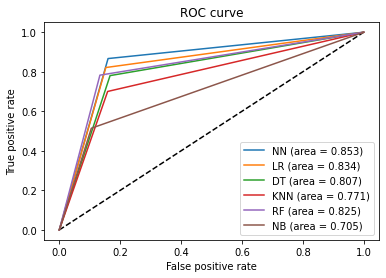

In [51]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_nn_p, tpr_nn_p, label='NN (area = {:.3f})'.format(auc_nn_p))
#plt.plot(fpr_svm_p, tpr_svm_p, label='SVM (area = {:.3f})'.format(auc_svm_p))
plt.plot(fpr_lr_p, tpr_lr_p, label='LR (area = {:.3f})'.format(auc_lr_p))
plt.plot(fpr_dt_p, tpr_dt_p, label='DT (area = {:.3f})'.format(auc_dt_p))
plt.plot(fpr_knn_p, tpr_knn_p, label='KNN (area = {:.3f})'.format(auc_knn_p))
plt.plot(fpr_rf_p, tpr_rf_p, label='RF (area = {:.3f})'.format(auc_rf_p))
plt.plot(fpr_bayes_p, tpr_bayes_p, label='NB (area = {:.3f})'.format(auc_bayes_p))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

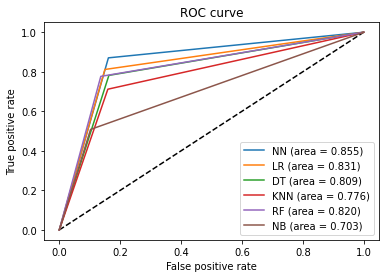

In [52]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_nn_c, tpr_nn_c, label='NN (area = {:.3f})'.format(auc_nn_c))
#plt.plot(fpr_svm_c, tpr_svm_c, label='SVM (area = {:.3f})'.format(auc_svm_c))
plt.plot(fpr_lr_c, tpr_lr_c, label='LR (area = {:.3f})'.format(auc_lr_c))
plt.plot(fpr_dt_c, tpr_dt_c, label='DT (area = {:.3f})'.format(auc_dt_c))
plt.plot(fpr_knn_c, tpr_knn_c, label='KNN (area = {:.3f})'.format(auc_knn_c))
plt.plot(fpr_rf_c, tpr_rf_c, label='RF (area = {:.3f})'.format(auc_rf_c))
plt.plot(fpr_bayes_c, tpr_bayes_c, label='NB (area = {:.3f})'.format(auc_bayes_c))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [0]:
# clf = svm.SVC(kernel="linear")
# clf.fit(x_train, y_train)
# predict_svm = clf.predict(x_test)

In [0]:
# Confusion_matrix(y_test,predict_svm)

Confusion Matrix
   0     1   << Classified as   
   29    101
   35    966
Accuracy: 0.8797524314765695
Sensitivity: 0.2230769230769231
Specificity: 0.965034965034965


In [0]:
# crossvalidate_SVM(10,X,Y)

Acc: 0.8741721854304636
Acc: 0.8761061946902655
Acc: 0.8849557522123894
Acc: 0.8938053097345132
Acc: 0.8915929203539823
Acc: 0.8738938053097345
Acc: 0.8761061946902655
Acc: 0.8938053097345132
Acc: 0.8938053097345132
Acc: 0.8938053097345132
Cross-validation
Confusion Matrix
   0     1   << Classified as   
   15    37
   14    385
Accuracy: 0.8815207780725022
Sensitivity: 0.28982725527831094
Specificity: 0.9627500000000001
